<a href="https://colab.research.google.com/github/m-kanuri/m-kanuri.github.io/blob/main/Unit04_Correlation_regression_Global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this notebook, we will perform correlation and regression analyses using global datasets.

Using data from Global_Population.csv & Global_GDP.csv undertake the following tasks (you can tackle this aspect of the work as a team, reviewing your individual solutions).

Task A: Correlation
Pre-process the data – mean population of each country and mean per capita GDP (from 2001 to 2021) by making some arrangements for the missing values (HINT: You will need to use the datasets Global_GDP.csv and Global_Population.csv). Investigate any correlation between the mean population of each country and the mean per capita GDP (from 2001 to 2021). Very briefly, interpret the generated plot. Evaluate the Pearson Correlation Coefficient.

Task B: Regression
Perform linear regression, where the independent variable is the mean population of each country (from 2001 to 2021) and dependent variable is mean per capita GDP (from 2001 to 2021). Be prepared to discuss your agreed results during the seminar session.



## Importing the required packages

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

## Load the data

In [9]:
# Reading the data
population_df=pd.read_csv("global_population.csv")
GDP_df=pd.read_csv("global_GDP.csv")

In [10]:
#  Displaying the first few rows of the Global Population dataset
population_df.head(10)

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,694664000
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,470898000
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000
5,Algeria,DZA,"Population, total",SP.POP.TOTL,11057864,11336336,11619828,11912800,12221675,12550880,...,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,44617000
6,American Samoa,ASM,"Population, total",SP.POP.TOTL,20127,20605,21246,22029,22850,23675,...,55669,55717,55791,55806,55739,55617,55461,55312,55197,55000
7,Andorra,AND,"Population, total",SP.POP.TOTL,13410,14378,15379,16407,17466,18542,...,82427,80770,79213,77993,77295,76997,77008,77146,77265,77000
8,Angola,AGO,"Population, total",SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,5770573,...,25107925,26015786,26941773,27884380,28842482,29816769,30809787,31825299,32866268,33934000
9,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,54132,55005,55849,56701,57641,58699,...,90407,91510,92562,93571,94520,95425,96282,97115,97928,99000


In [11]:
 # Displaying the first few rows of the Global GDP dataset
GDP_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10
5,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10
6,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09,NaN
7,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.491550e+12,2.728990e+12,2.787520e+12,2.818610e+12,2.452010e+12,2.400960e+12,2.455070e+12,2.717930e+12,2.763200e+12,2.436290e+12
8,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.506660e+11,3.745910e+11,3.901080e+11,4.031370e+11,3.581350e+11,3.570450e+11,3.856060e+11,4.222150e+11,4.172160e+11,3.588690e+11
9,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,5.301630e+11,5.459820e+11,5.520250e+11,5.263200e+11,5.947490e+11,5.575310e+11,6.436290e+11,5.248200e+11,4.519320e+11,3.892880e+11


# Data Preprocessing



##Exploring Dataset Structure: Column Names, Count, and Row Count
# Checking .head showed 2021 missing from global_GDP dataset

In [15]:
# column names, Number of columns & rows from global_population_df
population_columns = population_df.columns.tolist()
print("Columns in population_df:", population_columns)
print("Number of columns: ", len(population_df.columns))
print("Number of rows: ", len(population_df))
# column names, Number of columns & rows from global_GDP_df
gdp_columns = GDP_df.columns.tolist()
print("Columns in GDP_df:", gdp_columns)
print("Number of columns: ", len(GDP_df.columns))
print("Number of rows: ", len(GDP_df))

Columns in population_df: ['Country Name', 'Country Code', 'Series Name', 'Series Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
Number of columns:  66
Number of rows:  272
Columns in GDP_df: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '19

# Handling Missing Values and Data Inspection

In [16]:
#Data Type Conversion for Population Data: 1960-2021
for col in population_df.columns[population_df.columns.get_loc('1960'):population_df.columns.get_loc('2021') + 1]:
    population_df[col] = pd.to_numeric(population_df[col], errors='coerce').astype('Float64')  # Convert to Float64
population_df.info()
population_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  269 non-null    object 
 1   Country Code  267 non-null    object 
 2   Series Name   267 non-null    object 
 3   Series Code   267 non-null    object 
 4   1960          261 non-null    Float64
 5   1961          261 non-null    Float64
 6   1962          261 non-null    Float64
 7   1963          261 non-null    Float64
 8   1964          261 non-null    Float64
 9   1965          261 non-null    Float64
 10  1966          261 non-null    Float64
 11  1967          261 non-null    Float64
 12  1968          261 non-null    Float64
 13  1969          261 non-null    Float64
 14  1970          261 non-null    Float64
 15  1971          261 non-null    Float64
 16  1972          261 non-null    Float64
 17  1973          261 non-null    Float64
 18  1974          261 non-null    

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,<NA>,<NA>
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835000.0
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694664000.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898000.0
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,2832000.0
5,Algeria,DZA,"Population, total",SP.POP.TOTL,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,...,37383899.0,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0,44617000.0
6,American Samoa,ASM,"Population, total",SP.POP.TOTL,20127.0,20605.0,21246.0,22029.0,22850.0,23675.0,...,55669.0,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0,55000.0
7,Andorra,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,77000.0
8,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33934000.0
9,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,54132.0,55005.0,55849.0,56701.0,57641.0,58699.0,...,90407.0,91510.0,92562.0,93571.0,94520.0,95425.0,96282.0,97115.0,97928.0,99000.0


# Statistical Summary of Population Data

In [17]:
population_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,...,261.0,261.0,261.0,261.0,261.0,261.0,261.0,261.0,260.0,256.0
mean,108396403.049808,109811433.448276,111742669.114943,114142375.425287,116560086.689655,119036120.042146,121641363.954023,124238589.681992,126897385.130268,129651524.708812,...,262737506.452107,266163689.977012,269600365.436782,273027020.854406,276464542.329502,279910083.536398,283278941.62069,286569910.295019,290888602.923077,298388835.9375
std,355011192.74023,359201871.780592,365443973.714966,373546129.769251,381691540.010823,390060619.65594,398961811.296816,407809927.807763,416896974.225667,426351129.724068,...,865683294.643232,876478592.238112,887269620.475383,898003702.830244,908756268.930361,919558707.900225,930054835.238314,940268926.078858,951802843.208335,967321724.41653
min,2833.0,3077.0,3367.0,3703.0,4063.0,4460.0,4675.0,4922.0,5194.0,5461.0,...,10136.0,10208.0,10289.0,10374.0,10474.0,10577.0,10678.0,10764.0,10834.0,11000.0
25%,480579.0,491140.0,502558.0,513409.0,521753.0,526327.0,529328.0,554054.0,565763.0,577644.0,...,1322696.0,1317997.0,1336073.0,1370332.0,1377563.0,1384060.0,1389841.0,1394969.0,1626933.5,1982250.0
50%,3645600.0,3703600.0,3770756.0,3879191.0,3957759.0,4038865.0,4122517.0,4208683.0,4297522.0,4389248.0,...,9446836.0,9540302.0,9696110.0,9799186.0,9814023.0,9854033.0,9965322.0,10101697.0,10254352.0,10534000.0
75%,21906909.0,22480371.0,23071309.0,23680246.0,24307855.0,24954865.0,25624380.0,26280135.0,26944386.0,27652715.0,...,50199853.0,50428893.0,50746659.0,51482638.0,53045199.0,53382521.0,53708318.0,54045422.0,55634518.0,59582250.0
max,3032156070.0,3071596055.0,3124561005.0,3189655687.0,3255145692.0,3322046795.0,3392097729.0,3461619724.0,3532782993.0,3606553753.0,...,7089254548.0,7175500378.0,7261846543.0,7347679005.0,7433569330.0,7519183459.0,7602454161.0,7683372259.0,7761620146.0,7831742000.0


# Statistical Summary of GDP Data

In [19]:
GDP_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1.280000e+02,1.340000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.480000e+02,1.510000e+02,1.540000e+02,1.590000e+02,1.590000e+02,...,2.580000e+02,2.570000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.530000e+02,2.410000e+02
mean,7.212620e+10,7.253422e+10,7.563842e+10,8.157455e+10,8.961293e+10,9.099092e+10,1.012580e+11,1.050472e+11,1.101137e+11,1.217651e+11,...,2.759371e+12,2.407733e+12,2.482235e+12,2.552297e+12,2.407171e+12,2.447089e+12,2.620383e+12,2.786476e+12,2.864599e+12,2.902891e+12
std,2.176036e+11,2.218540e+11,2.356864e+11,2.535576e+11,2.773002e+11,2.912243e+11,3.188597e+11,3.372441e+11,3.591549e+11,3.953002e+11,...,8.812007e+12,8.167101e+12,8.387677e+12,8.614521e+12,8.170629e+12,8.321307e+12,8.851830e+12,9.424050e+12,9.619814e+12,9.541022e+12
min,1.201201e+07,1.159201e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.871181e+07,3.767177e+07,3.750908e+07,3.729061e+07,3.549207e+07,3.654780e+07,4.061925e+07,4.258816e+07,4.727146e+07,4.885555e+07
25%,4.930171e+08,5.007338e+08,5.317365e+08,5.161478e+08,5.828164e+08,5.981193e+08,6.526923e+08,6.381097e+08,6.713500e+08,7.234677e+08,...,8.106591e+09,8.709165e+09,8.747774e+09,9.297231e+09,8.738203e+09,8.666853e+09,9.565595e+09,1.046233e+10,1.131495e+10,1.218235e+10
50%,2.661047e+09,2.966849e+09,2.814319e+09,3.540403e+09,3.405333e+09,3.038595e+09,3.170500e+09,3.377453e+09,3.941700e+09,4.485778e+09,...,4.687279e+10,4.658046e+10,4.981676e+10,5.114388e+10,5.006595e+10,4.886913e+10,5.332271e+10,5.614404e+10,6.113687e+10,6.240971e+10
75%,2.209377e+10,2.947115e+10,2.886179e+10,3.341615e+10,3.106358e+10,2.717988e+10,2.892630e+10,3.037142e+10,3.339213e+10,3.744464e+10,...,5.702930e+11,5.524840e+11,5.447092e+11,5.456262e+11,5.051040e+11,5.261240e+11,5.666715e+11,5.634442e+11,5.972810e+11,7.522480e+11
max,1.387920e+12,1.444480e+12,1.546110e+12,1.666850e+12,1.825210e+12,1.988350e+12,2.157980e+12,2.296120e+12,2.478140e+12,2.733380e+12,...,8.149280e+13,7.535600e+13,7.742740e+13,7.953110e+13,7.510080e+13,7.629400e+13,8.118190e+13,8.625120e+13,8.755520e+13,8.467990e+13


#Data Preparation and Merging for Population and GDP Analysis

In [20]:
# Selecting Relevant Columns and Years
population_data = population_df[['Country Name', 'Country Code'] + list(population_df.columns[population_df.columns.get_loc('2001'):population_df.columns.get_loc('2021') + 1])]
gdp_data = GDP_df[['Country Name', 'Country Code'] + list(GDP_df.columns[GDP_df.columns.get_loc('2001'):GDP_df.columns.get_loc('2020') + 1])]

# Handling Missing Values
population_data = population_data.fillna(population_data.mean(numeric_only=True))
gdp_data = gdp_data.fillna(gdp_data.mean(numeric_only=True))

# Calculating Mean Values
population_data['Mean Population'] = population_data.iloc[:, 2:].mean(axis=1)
gdp_data['Mean GDP'] = gdp_data.iloc[:, 2:].mean(axis=1)

# Merging Population and GDP Data
merged_data = pd.merge(population_data[['Country Name', 'Country Code', 'Mean Population']], gdp_data[['Country Name', 'Country Code', 'Mean GDP']], on=['Country Name', 'Country Code'], how='inner')

# Display the merged data
display(merged_data.style.format({"Mean Population": "{:.2f}", "Mean GDP": "{:.2f}"}))

,Country Name,Country Code,Mean Population,Mean GDP
0,Aruba,ABW,28152663.28,290672495247.82
1,Afghanistan,AFG,30671178.33,64713919327.30
2,Africa Eastern and Southern,AFE,539868031.57,744152200000.00
3,Africa Western and Central,AFW,364777435.19,557049350000.00
4,Albania,ALB,2930952.67,10923565642.10
5,Algeria,DZA,37228087.57,145487823914.10
6,American Samoa,ASM,56909.43,51957419966.25
7,Andorra,AND,78524.14,148078632629.07
8,Angola,AGO,24650711.52,78685161602.65
9,Antigua and Barbuda,ATG,88624.33,1215262777.70


##Pearson Correlation Coefficient.

In [21]:
correlation = merged_data['Mean Population'].corr(merged_data['Mean GDP'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

Pearson Correlation Coefficient: 0.71


##Correlation Scatter plot

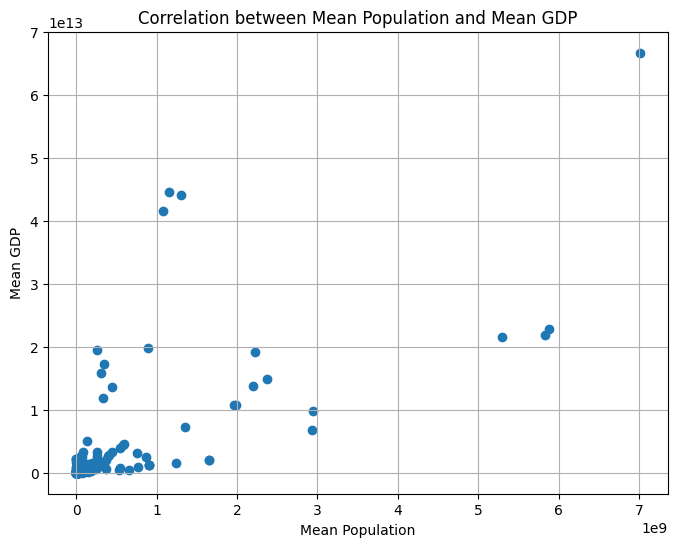

In [22]:
# Scatter plot to visually represent the relationship between mean population and mean GDPplt.figure(figsize=(8, 6))
plt.scatter(merged_data['Mean Population'], merged_data['Mean GDP'])
plt.xlabel("Mean Population") # Label the axes for clarity
plt.ylabel("Mean GDP")
plt.title("Correlation between Mean Population and Mean GDP")
plt.grid(True)
plt.show() # Displays the scatter plot.

##Correlation Scatter plot with a logarithmic scale

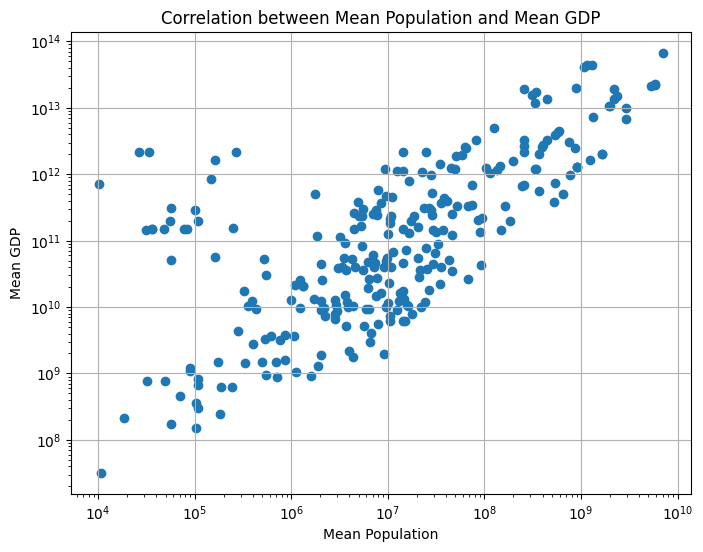

In [23]:
plt.figure(figsize=(8, 6))  # Sets the figure size for better visualization.
plt.scatter(merged_data['Mean Population'], merged_data['Mean GDP']) #  Plots the data points for mean population (x-axis) and mean GDP (y-axis).
plt.xlabel("Mean Population")  # Label the axes for clarity
plt.ylabel("Mean GDP") # Label the axes for clarity
plt.title("Correlation between Mean Population and Mean GDP") # Provides a descriptive title for the plot
plt.xscale('log')  # Applies a Logarithmic scale for x-axis
plt.yscale('log')  # Applies a Logarithmic scale for y-axis
plt.grid(True)  # Add a grid for improved readability
plt.show() #  Displays the scatter plot

##Linear Regression Analysis

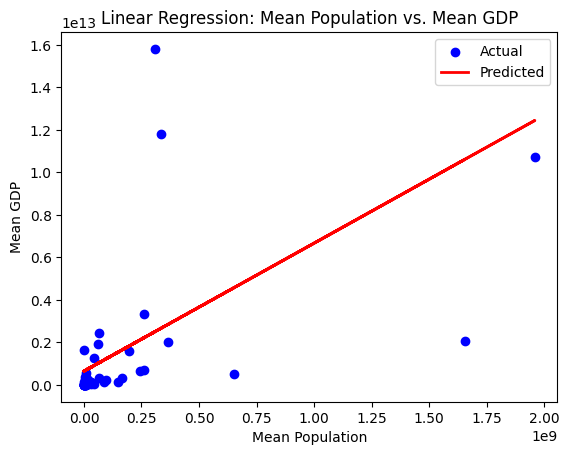

Intercept: 649490326382.5786
Regression Coefficient: 6021.493998004415


In [24]:
# Prepare the data
X = merged_data[['Mean Population']]  # Independent variable
y = merged_data['Mean GDP']  # Dependent variable

# Dividing the dataset into 80% training and 20% testing to evaluate model performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Visualizing the regression results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Mean Population")
plt.ylabel("Mean GDP")
plt.title("Linear Regression: Mean Population vs. Mean GDP")
plt.legend()
plt.show()

# Evaluating Model coefficients
print("Intercept:", model.intercept_)
print("Regression Coefficient:", model.coef_[0])

## Log - Transformed Linear Regression

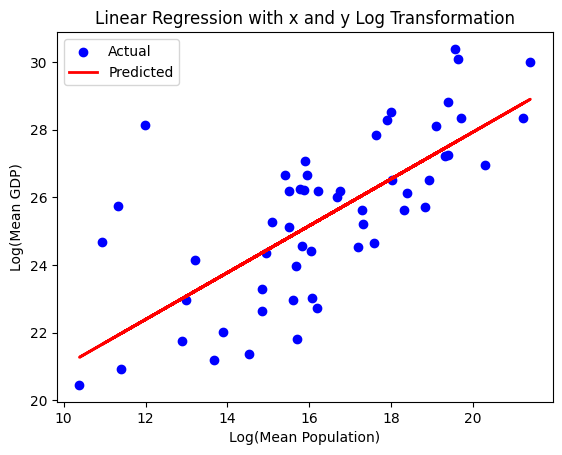

Intercept: 14.06439511932512
Regression Coefficient: 0.6935684864268155


In [25]:
# Transforming the independent (Mean Population) and dependent (Mean GDP) variables to stabilize variance and normalize skewed data.
X_log = np.log(merged_data[['Mean Population']])
y_log = np.log(merged_data['Mean GDP'])

# Dividing the transformed dataset into 80% training and 20% testing for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Training the Log-Transformed Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Making Predictions on Test Data
y_pred = model.predict(X_test)

# Visualizing the Regression Results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Log(Mean Population)")
plt.ylabel("Log(Mean GDP)")
plt.title("Linear Regression with x and y Log Transformation")
plt.legend()
plt.show()

# Evaluating Model Coefficients
print("Intercept:", model.intercept_)
print("Regression Coefficient:", model.coef_[0])

# Evaluating Model Performance Using R-squared

In [26]:
r_squared = model.score(X, y)
print(f'R-squared Value: {r_squared:.3f}')

R-squared Value: -0.092
